# *Отток клиентов*

---
#### *Правило №1:* Разделяйте задачу на разделы. 
#### *Правило №2:* Для каждой задачи стоит прилагать описание. Это помогает быстро понять для каких целей проводилось это исследование и могут ли данные инструменты помочь в других задачах.
---

## 1. Описание задачи.
#### В данном ноутбуке продемонстрирован анализ данных по оттоку клиентов из банка. С помощью приложенных модулей и функций можно проанализровать более подробно текущие данные или повторить исследование для данных похожего формата. 

## 2. Загрузка данных и всех необходимых библиотек. 

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pylab
from sklearn.manifold import TSNE
from numpy import where
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [5]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## 3. Анализ данных.

### 3.1. Исследование пропусков.

---
#### *Правило №3:* Описывайте каждый шаг исследования, даже если какие-то пункты не дают значимых результатов. Во-первых, готовые инструменты могут помочь для решения других подобных задач. Во-вторых, описание всех шагов помогает понять, какие гипотезы проверяли и что можно попробовать изменить.

#### *Правило №4:* Если какой-то шаг исследования нужно будет повторить или преобразование данных достаточно большое, лучше код обернуть в функцию, таким образом можно избежать дублирования кода. Также стоит заранее продумывать уровень абстракции, чтобы инструменты оставались актуальными для задачи, даже если входные данные или условия задачи немного изменятся.


#### *Правило №5:* Из названия функции должно быть понятно, что она делает. Также все отдельные функции и классы должны иметь документацию. Документации помогает понять более детально, что делает объект и какие переменные в него передавать.
---

#### На первом шаге данные исследуются на пропуски. 

In [6]:
def sort_missing_value(data):
    '''Displays the number of missing features (in descending order)
    
    Args:
    data(pd.DataFrame) = data for checking
    '''
    return data.isnull().sum().sort_values(ascending=False)

In [7]:
sort_missing_value(data)

Exited             0
EstimatedSalary    0
IsActiveMember     0
HasCrCard          0
NumOfProducts      0
Balance            0
Tenure             0
Age                0
Gender             0
Geography          0
CreditScore        0
Surname            0
CustomerId         0
RowNumber          0
dtype: int64

#### В данных пропусков нет. Далее можно исследовать баланс классов и взаимосвязи между признаками и целевой переменной.

In [4]:
import visualization as vsl

---
#### *Правило №6:* Если объект занимает больше 20 строк, их стоит оформлять в py файлы. 
---

### 3.2. Анализ распределения целевой переменной

In [5]:
vis = vsl.VisualizationTool(data)

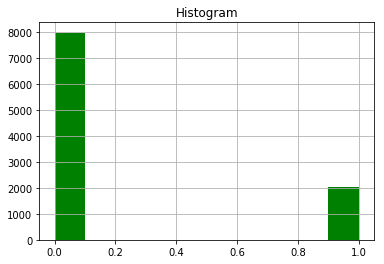

In [6]:
vis.get_feature_distribution('Exited')

#### В данных есть дисбаланс классов. Сначала стоит попробовать построить модели на такой выборке, а после сэмплировать выборку и строить модели еще раз.

### 3.3. Анализ вещественных признаков

#### Нужно проанализировать взаимосвязь между различными вещественными признаками, понять как они распределены и есть ли выбросы в данных.

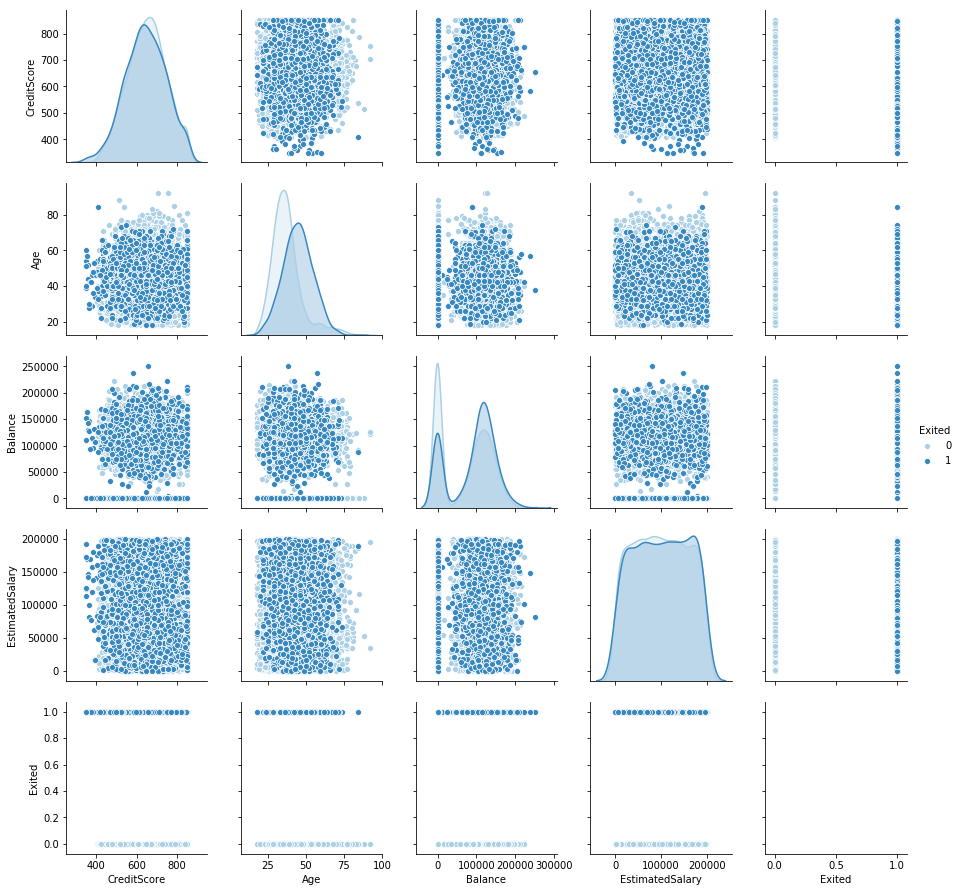

In [7]:
vis.compare_numerical_features(['CreditScore', 'Age', 'Balance', 'EstimatedSalary','Exited'],
                           "Blues")

#### По графикам видно, что распределения признаков похожи для клиентов которые ушли и для клиентов, которые до сих пор пользуются услугами банка. Также видно, что в некоторых случаях есть выбросы. Выборка небольшая, поэтому стоит аккуратно отсекать объекты, которые выбиваются из общего распределения. Можно визуализировать все признаки в меньшем пространстве, чтобы понять как объекты располагаются относительно друг друга в общем случае. Вполне возможно, что для общего случая выбросы тяжелее будет определить.

### 3.4. Анализ взаимосвязей между категориальными и вещественными признаками

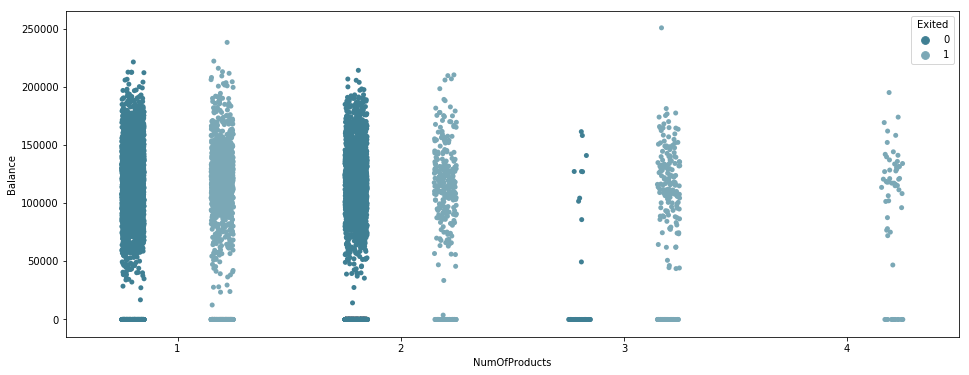

In [6]:
vis.compare_numerical_and_categorical_features('NumOfProducts', 'Balance', sns.diverging_palette(220, 20, n=7))

#### Можно заметить, что с ростом количества продуктов у клиента, растет вероятность его ухода, что является не очень хорошим показателем. Возможно, отток клиентов связан с какими-то определенными продуктами банками. 

---
#### *Правило №7:* Каждый шаг стоит выносить в отдельные ячейки. В таком случае легче понять, что происходит на каждом шаге. 
---

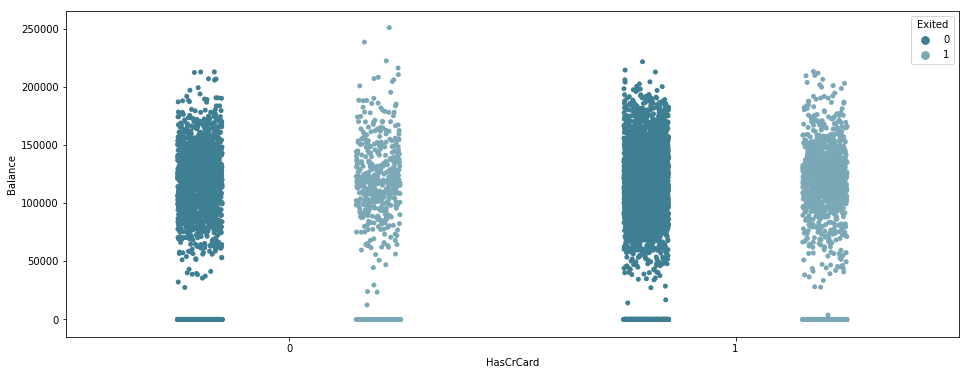

In [9]:
vis.compare_numerical_and_categorical_features('HasCrCard', 'Balance', sns.diverging_palette(220, 20, n=7))

#### Возможно, кредитная карта является одним из тех продуктов, из-за которых клиенты уходят.

### 3.5. Анализ категориальных признаков.

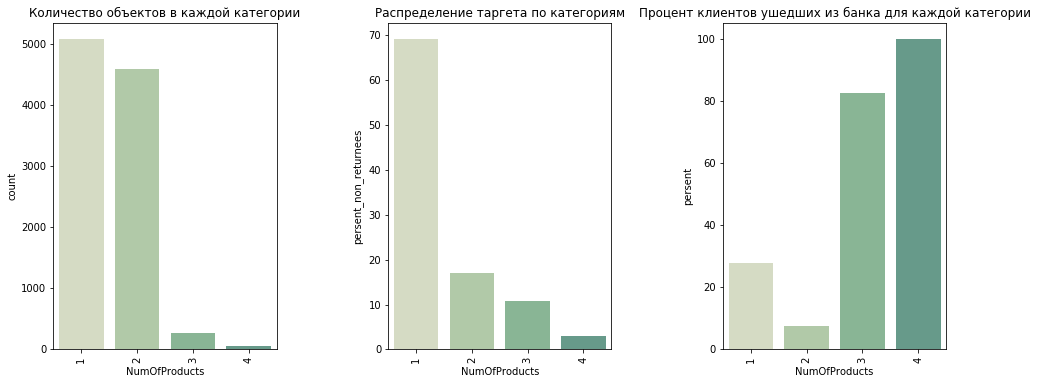

In [11]:
vis.get_stat_category_features('NumOfProducts', sns.cubehelix_palette(8, start=.5, rot=-.75), True)

#### В данном случае подтвержается гипотеза о том, что чаще уходят люди, у которых большое количество продуктов в банке. Несмотря на то, что почти 70% ушедших людей пользовались всего одной услугой (это связанно ислючетельно с распределением объектов в выборке). 

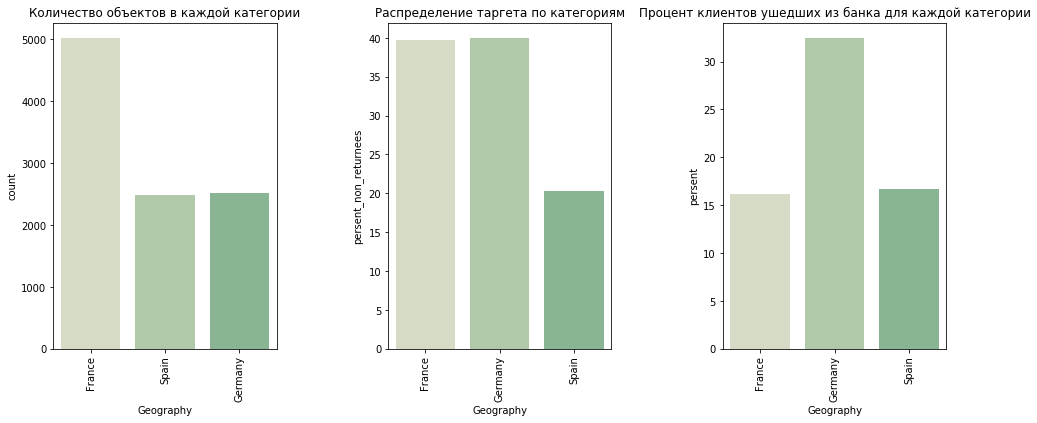

In [12]:
vis.get_stat_category_features('Geography', sns.cubehelix_palette(8, start=.5, rot=-.75), True)

#### Видно, что в Германии значительно чаще уходят клиенты, хотя в выборке всего четверть клиентов оттуда. 

### 3.6. Анализ зависимости между вещественными переменными и таргетом.

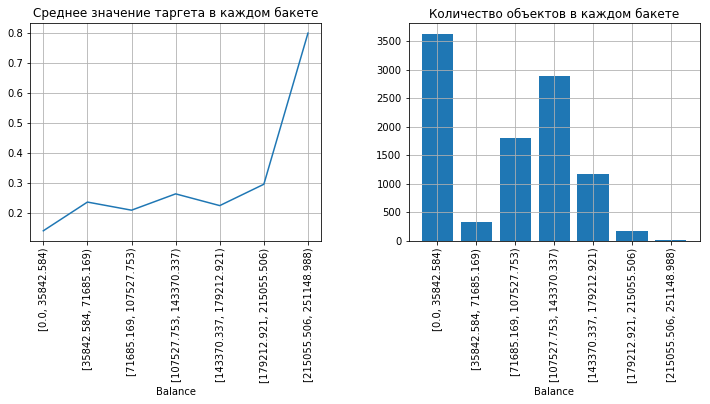

In [13]:
vis.get_dynamics_numerical_features('Balance', 7)

#### Очень резкий рост оттока клиентов в том случае, если на балансе большая сумма. Интересно то, что до определенного значения баланса, среднее значение целевой переменной почти не растет.  Также стоит отметить, что очень маленькое количество клиентов имеют большое количество денег на счету (они же чаще и уходят). 

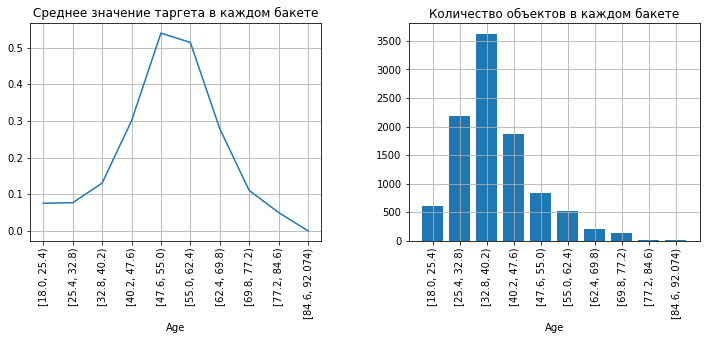

In [15]:
vis.get_dynamics_numerical_features('Age', 10)

#### Как было описано ранее, чаще клиенты уходят из банка в среднем возрасте. Но на этих графиках лучше видно, что это не связано с количеством объектов в выборке.  Так как больше всего людей от 32 до 40 лет, а уходят чаще в более зрелом возрасте.

### 3.7. Визуализация всех признаков в двухмерном пространстве. 

#### Также на этапе визуализации можно посмотреть как объекты располагаются относительно друг друга на плоскости. Это поможет понять какие признаки разделяют выборку лучше и есть ли аномалии в выборке. Чтобы сохранить не абсолютное расстояние между объектами, а отношение расстояний между объектами, можно использовать метод t-sne. Так как в выборке всего 10 признаков, то операция будет не очень трудоемкой.  

#### Категориальные признаки лучше кодировать one-hot кодированием, чтобы не задавать порядок между значениями. Это важно в этом случае, так как алгоритм строится на основе расстояний между объектами.

In [17]:
tsne = TSNE(n_components=2)

In [18]:
data_tsne = data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
'IsActiveMember', 'EstimatedSalary', 'Exited']]

In [19]:
data_tsne = pd.get_dummies(data_tsne, ['Geography', 'Gender'])

In [20]:
tsne_results = tsne.fit_transform(data_tsne)

In [21]:
data_tsne['tsne-2d-one'] = tsne_results[:,0]
data_tsne['tsne-2d-two'] = tsne_results[:,1]

In [22]:
def get_plot_tsne(data, feature):
    '''Displays a graph for data tsne
    
    Agrs:
    data(pd.DataFrame) = data for checking
    feature(str) = feature for visualization
    '''
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue=feature,
        palette=sns.color_palette("hls", 2),
        data=data,
        legend="full",
        alpha=0.3
    )

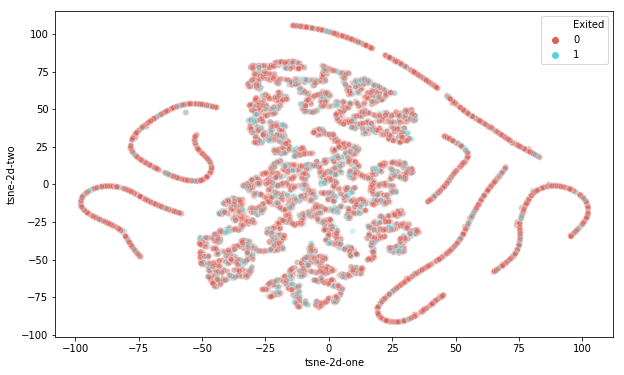

In [23]:
get_plot_tsne(data_tsne, 'Exited')

#### Данные имеют сложную нелинейную зависимость, классы очень сильно перемешаны. Однако, можно заметить, что в выборке нет явных выбросов. Кажется, данные из правой части графика еще сильнее усложняют задачу, но так как в левой части классы тоже сильно перемешаны, а сама выборка достаточно маленькая, нет смысла что-то пытаться отсекать. 

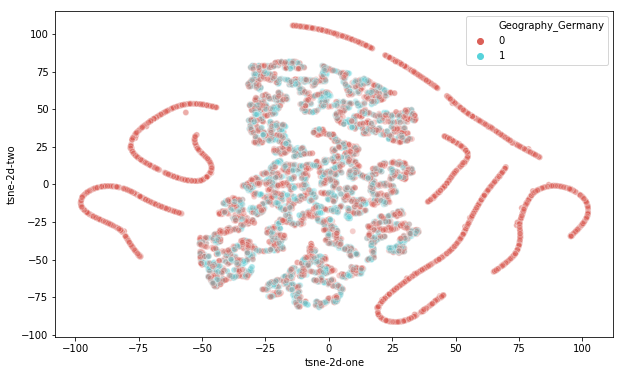

In [24]:
get_plot_tsne(data_tsne, 'Geography_Germany')

#### Возвращаясь к структуре данных, можно заметить, что бинарный признак, который характеризует клиентов из Германии, хоть как-то разделяет классы. Этот факт еще раз подтвержает гипотезу о том, что не стоит отсекать какие-то данные.